Data loaded successfully!
First few rows of the dataset:
  subject  sessionIndex  rep  H.period  DD.period.t  UD.period.t     H.t  \
0    s002             1    1    0.1491       0.3979       0.2488  0.1069   
1    s002             1    2    0.1111       0.3451       0.2340  0.0694   
2    s002             1    3    0.1328       0.2072       0.0744  0.0731   
3    s002             1    4    0.1291       0.2515       0.1224  0.1059   
4    s002             1    5    0.1249       0.2317       0.1068  0.0895   

   DD.t.i  UD.t.i     H.i  ...     H.a  DD.a.n  UD.a.n     H.n  DD.n.l  \
0  0.1674  0.0605  0.1169  ...  0.1349  0.1484  0.0135  0.0932  0.3515   
1  0.1283  0.0589  0.0908  ...  0.1412  0.2558  0.1146  0.1146  0.2642   
2  0.1291  0.0560  0.0821  ...  0.1621  0.2332  0.0711  0.1172  0.2705   
3  0.2495  0.1436  0.1040  ...  0.1457  0.1629  0.0172  0.0866  0.2341   
4  0.1676  0.0781  0.0903  ...  0.1312  0.1582  0.0270  0.0884  0.2517   

   UD.n.l     H.l  DD.l.Return  UD.l.Retu

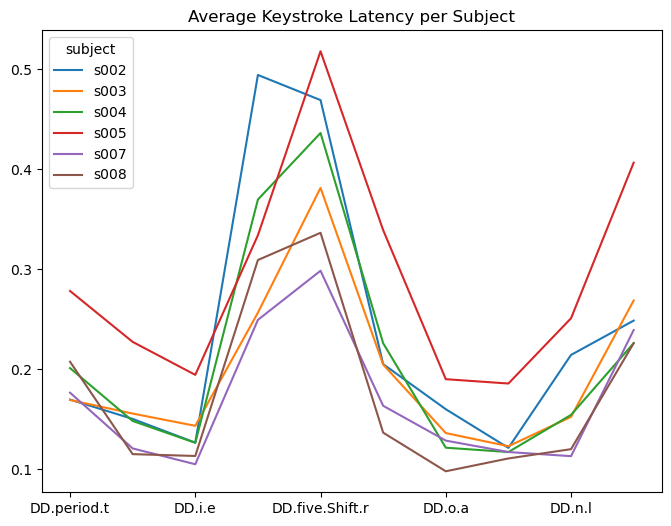

K-Nearest Neighbor Classifier Accuracy: 0.8510
Support Vector Linear Classifier Accuracy: 0.8596
Multi-Layer Perceptron Classifier Accuracy: 0.9206


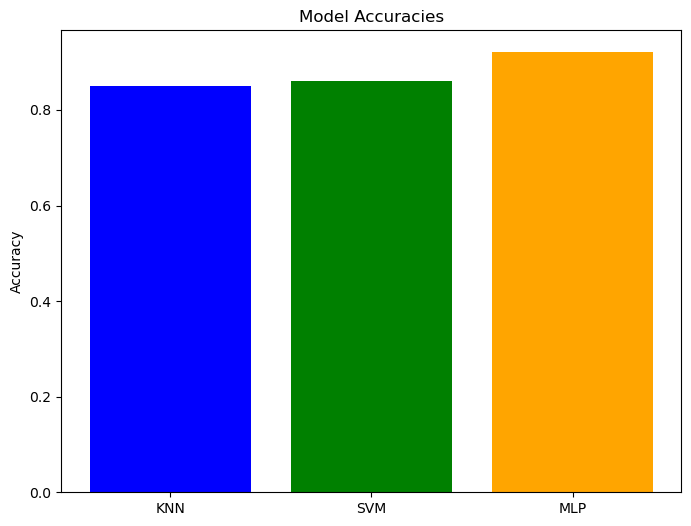

In [8]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler

# Load the dataset
file_path = "C:/Users/ASWANTH/Downloads/DSL-StrongPasswordData.csv"
try:
    pwd_data = pd.read_csv(file_path, header=0)
    print("Data loaded successfully!")
except FileNotFoundError:
    print(f"File not found: {file_path}")
    raise

# Display first few rows of the dataset for verification
print("First few rows of the dataset:")
print(pwd_data.head())

# Check for missing values
print("\nMissing values per column:")
print(pwd_data.isnull().sum())

# Average Keystroke Latency per Subject
DD = [dd for dd in pwd_data.columns if dd.startswith('DD')]
if not DD:
    print("No columns starting with 'DD' found.")
else:
    plot = pwd_data[DD].copy()  # Make an explicit copy to avoid warnings
    plot['subject'] = pwd_data['subject'].values
    plot = plot.groupby('subject').mean()
    plot.iloc[:6].T.plot(figsize=(8, 6), title='Average Keystroke Latency per Subject')
    plt.show()

# Split the data into training and testing sets
data_train, data_test = train_test_split(pwd_data, test_size=0.2, random_state=0)
X_train = data_train[pwd_data.columns[2:]]  # Features start from 3rd column
y_train = data_train['subject']
X_test = data_test[pwd_data.columns[2:]]
y_test = data_test['subject']

# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# K-Nearest Neighbor Classifier
knc = KNeighborsClassifier()
knc.fit(X_train, y_train)
y_pred = knc.predict(X_test)
knc_accuracy = metrics.accuracy_score(y_test, y_pred)
print(f'K-Nearest Neighbor Classifier Accuracy: {knc_accuracy:.4f}')

# Support Vector Classifier
svc = svm.SVC(kernel='linear')
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
svc_accuracy = metrics.accuracy_score(y_test, y_pred)
print(f'Support Vector Linear Classifier Accuracy: {svc_accuracy:.4f}')

# Multi-Layer Perceptron Classifier
mlpc = MLPClassifier(max_iter=500, random_state=0)
mlpc.fit(X_train, y_train)
y_pred = mlpc.predict(X_test)
mlpc_accuracy = metrics.accuracy_score(y_test, y_pred)
print(f'Multi-Layer Perceptron Classifier Accuracy: {mlpc_accuracy:.4f}')

# Plot Model Accuracies
accuracies = {
    'KNN': knc_accuracy,
    'SVM': svc_accuracy,
    'MLP': mlpc_accuracy
}

plt.figure(figsize=(8, 6))
plt.bar(accuracies.keys(), accuracies.values(), color=['blue', 'green', 'orange'])
plt.title('Model Accuracies')
plt.ylabel('Accuracy')
plt.show()
